## ライブラリのインポートとインストール

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=efe40af9ee763084b72b0cb7607014a0dc75a18e32f0cbfef73f38791fea283e
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
import face_recognition

face_recognitionはノートブックの設定を「GPU」にしなければエラーが起こるので注意です。

In [3]:
# 画像取扱い用
from PIL import Image, ImageDraw
# Colabでファイルをアップロード用
from google.colab import files

In [5]:
ls

sample_data/


## 画像ファイルのアップロード

In [7]:
files.upload()

Saving girl01.jpg to girl01.jpg
Saving girl02.jpg to girl02.jpg
Saving girl03.jpg to girl03.jpg
Saving men01.jpg to men01.jpg
Saving men02.jpg to men02.jpg
Saving men03.jpg to men03.jpg
Saving men04.jpg to men04.jpg


{'girl01.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\xc7\x00\xb7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16

In [8]:
ls

girl01.jpg  girl03.jpg  men02.jpg  men04.jpg
girl02.jpg  men01.jpg   men03.jpg  sample_data/


あらかじめ、顔の画像は200px x 200px で納めています。<br>
データが大きすぎると正しく判別できないので注意です。

## 顔認識

In [9]:
# 画像データの読み込み
image = face_recognition.load_image_file('girl01.jpg')
# 顔の位置情報の検出
face_locations = face_recognition.face_locations(image)
face_locations

[(68, 139, 175, 32)]

In [10]:
image

array([[[204, 240, 254],
        [204, 240, 254],
        [204, 240, 254],
        ...,
        [201, 234, 253],
        [201, 234, 253],
        [201, 234, 253]],

       [[204, 240, 254],
        [204, 240, 254],
        [204, 240, 254],
        ...,
        [202, 235, 254],
        [202, 235, 254],
        [202, 235, 254]],

       [[204, 240, 254],
        [204, 240, 254],
        [204, 240, 254],
        ...,
        [202, 235, 254],
        [202, 235, 254],
        [202, 235, 254]],

       ...,

       [[149, 188, 205],
        [149, 188, 205],
        [149, 188, 205],
        ...,
        [138, 176, 195],
        [137, 175, 194],
        [137, 175, 194]],

       [[149, 188, 205],
        [149, 188, 205],
        [149, 188, 205],
        ...,
        [137, 175, 194],
        [137, 175, 194],
        [137, 175, 194]],

       [[149, 188, 205],
        [148, 187, 204],
        [148, 187, 204],
        ...,
        [137, 175, 194],
        [136, 174, 193],
        [136, 174, 193]]

## 顔の位置を描画

In [17]:
def face_detection(image,face_locations):
  #座標の調整
  face_locations = (face_locations[0][1], face_locations[0][0],face_locations[0][3],face_locations[0][2])
  #数値データから画像に変換
  im = Image.fromarray(image)
  #画像を格納
  draw = ImageDraw.Draw(im)
  #顔の周りを線で囲む
  draw.rectangle(face_locations, fill= None, outline=(255,0,0), width=5)
  return im

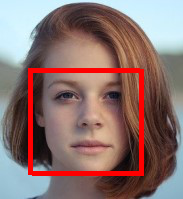

In [18]:
face_detection(image,face_locations)

きちんと顔だけを検出していることがわかります。<br>
他の画像でも試してみましょう

In [19]:
image02 = face_recognition.load_image_file('girl02.jpg')
image03 = face_recognition.load_image_file('men01.jpg')

In [20]:
face_locations = face_recognition.face_locations(image02)

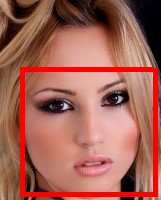

In [21]:
face_detection(image02,face_locations)

In [22]:
face_locations = face_recognition.face_locations(image03)

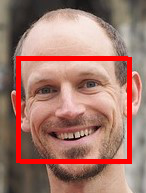

In [23]:
face_detection(image03,face_locations)

問題なく顔部分の検出ができています。<br>
face_recognitionをインストールするだけで簡単に実装が可能です。